In [13]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

8.55557019231621 59.9322833308737
-56.55927746997352 129.3902698345671
88.119721439426 170.4621477352557
42.38221904935497 176.09916699394734
10.548072705982818 -105.92465967857837
81.84805651896275 -6.271368443888008
-71.10278621124608 -31.18148784189313
26.30808248084918 146.82750170900016
-62.682767372188664 -11.00104379047059
83.46485137984024 -171.8339172430508
-89.69136014830413 -124.1433156272472
-62.11266643144636 44.77672080014926
50.44638469370139 122.69182441223
-86.62820613886247 124.90722570083966
9.023633995430473 138.36165386903133
-15.592954905284898 94.37775236963773
-33.614865379220554 175.4889515685137
25.68106298951203 -46.45123897573606
70.9245702683854 -34.93194648074828
9.397174108149486 -38.848598390194496
65.66657178123859 -160.66197032563952
-23.49236930897203 -28.538280741731967
1.4515335499725381 169.65434976197201
45.491965657121455 -140.76489204322803
70.1318438253808 5.825554156433412
-6.481219586492699 113.93823514825635
-78.78182293832305 -45.4209622004

-34.49068870329728 177.39314188190497
34.63716642364986 68.91897442423578
-52.80927069647577 62.474731893782945
9.75321640236028 -135.3147197316053
31.989975633247667 -49.962611638634996
14.489505993018625 67.42748857889032
-15.867527250906846 -178.5103147545214
-86.40675242687438 12.68928539648067
-45.80509330591269 141.1210751240854
2.2755589783596406 -133.3634010699937
84.62792980441341 -64.79079510097685
52.00598328300984 128.71906544861417
83.56082602756467 86.4271524856947
59.2536585719503 92.9356805948405
31.675638886829176 54.00903863384599
-55.39596356081661 -24.159979003228074
-79.1931048116594 -75.66815121773317
-83.98736215082963 158.01787353335442
-17.215857624835863 68.67521375768976
5.957936768616179 -173.012503208769
-46.32743506044357 -1.665134302501798
-56.720210858311354 -61.32727707484791
-85.8070048801122 99.38605744956311
56.69905563881318 -150.01524358682497
33.56445746290447 -24.00300062135014
-83.64865028881859 33.773162977443775
-42.065967834176575 169.6581590

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e9b71909c622a1d4cabf350397330a8e


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | alihe
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | russell
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | acarau
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | caravelas
Processing Record 23 of Set 1 | buariki
City not found. Skippin

Processing Record 41 of Set 4 | labuhan
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | iskateley
Processing Record 44 of Set 4 | urengoy
Processing Record 45 of Set 4 | carballo
Processing Record 46 of Set 4 | khuzhir
Processing Record 47 of Set 4 | surt
Processing Record 48 of Set 4 | el viejo
Processing Record 49 of Set 4 | gat
Processing Record 50 of Set 4 | maniitsoq
Processing Record 1 of Set 5 | cururupu
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | ballina
Processing Record 7 of Set 5 | rocha
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | tambul
City not found. Skipping...
Processing Record 10 of Set 5 | port elizabeth
Processing Record 11 of Set 5 | ternate
Processing Record 12 of Set 5 | sur
Processing Record 13 of Set 5 | isangel
Processing Record 14 of Set 5 

Processing Record 30 of Set 8 | umea
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | chabahar
Processing Record 33 of Set 8 | mahebourg
Processing Record 34 of Set 8 | wapi pathum
Processing Record 35 of Set 8 | krasnotorka
Processing Record 36 of Set 8 | blackwater
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | sao jose do rio pardo
Processing Record 39 of Set 8 | idaho falls
Processing Record 40 of Set 8 | nsanje
Processing Record 41 of Set 8 | manta
Processing Record 42 of Set 8 | sitamau
Processing Record 43 of Set 8 | nabire
Processing Record 44 of Set 8 | takoradi
Processing Record 45 of Set 8 | sao lourenco do sul
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | uvinza
Processing Record 48 of Set 8 | georgetown
Processing Record 49 of Set 8 | san andres
Processing Record 50 of Set 8 | staraya mayna
Processing Record 1 of Set 9 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 2 of Set 9 | syria

Processing Record 11 of Set 12 | broome
Processing Record 12 of Set 12 | karpathos
Processing Record 13 of Set 12 | mayo
Processing Record 14 of Set 12 | belle glade
Processing Record 15 of Set 12 | stromness
Processing Record 16 of Set 12 | edd
Processing Record 17 of Set 12 | zyryanka
Processing Record 18 of Set 12 | toowoomba
Processing Record 19 of Set 12 | geresk
City not found. Skipping...
Processing Record 20 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 21 of Set 12 | xifeng
Processing Record 22 of Set 12 | dawlatabad
Processing Record 23 of Set 12 | idrinskoye
Processing Record 24 of Set 12 | kidal
Processing Record 25 of Set 12 | nanchang
Processing Record 26 of Set 12 | linjiang
Processing Record 27 of Set 12 | haines junction
Processing Record 28 of Set 12 | najran
Processing Record 29 of Set 12 | capilla de guadalupe
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | moate
Processing Record 32 of Set 12 | kaeo
Processing Recor

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bandarbeyla,9.4942,50.8122,77.11,73,72,19.01,SO,2022-12-29 21:39:43
1,Mount Gambier,-37.8333,140.7667,60.62,65,26,6.85,AU,2022-12-29 21:39:43
2,Pevek,69.7008,170.3133,-22.50,99,100,6.98,RU,2022-12-29 21:39:43
3,Nikolskoye,59.7035,30.7861,26.49,93,100,10.29,RU,2022-12-29 21:39:44
4,Lazaro Cardenas,17.9583,-102.2000,81.30,59,100,10.02,MX,2022-12-29 21:39:44
5,Husavik,66.0449,-17.3389,20.34,69,100,18.21,IS,2022-12-29 21:39:45
6,Ushuaia,-54.8000,-68.3000,46.06,71,75,24.16,AR,2022-12-29 21:37:42
7,Katsuura,35.1333,140.3000,45.95,54,99,12.35,JP,2022-12-29 21:39:45
8,Cape Town,-33.9258,18.4232,63.10,59,0,31.07,ZA,2022-12-29 21:35:00
9,Punta Arenas,-53.1500,-70.9167,55.51,47,20,31.07,CL,2022-12-29 21:38:42


In [19]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bandarbeyla,SO,2022-12-29 21:39:43,9.4942,50.8122,77.11,73,72,19.01
1,Mount Gambier,AU,2022-12-29 21:39:43,-37.8333,140.7667,60.62,65,26,6.85
2,Pevek,RU,2022-12-29 21:39:43,69.7008,170.3133,-22.50,99,100,6.98
3,Nikolskoye,RU,2022-12-29 21:39:44,59.7035,30.7861,26.49,93,100,10.29
4,Lazaro Cardenas,MX,2022-12-29 21:39:44,17.9583,-102.2000,81.30,59,100,10.02
5,Husavik,IS,2022-12-29 21:39:45,66.0449,-17.3389,20.34,69,100,18.21
6,Ushuaia,AR,2022-12-29 21:37:42,-54.8000,-68.3000,46.06,71,75,24.16
7,Katsuura,JP,2022-12-29 21:39:45,35.1333,140.3000,45.95,54,99,12.35
8,Cape Town,ZA,2022-12-29 21:35:00,-33.9258,18.4232,63.10,59,0,31.07
9,Punta Arenas,CL,2022-12-29 21:38:42,-53.1500,-70.9167,55.51,47,20,31.07


In [20]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/29/22'

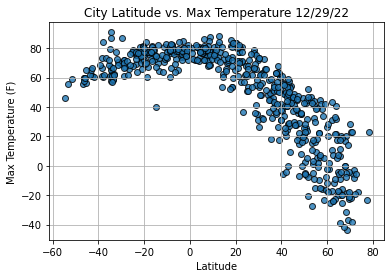

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

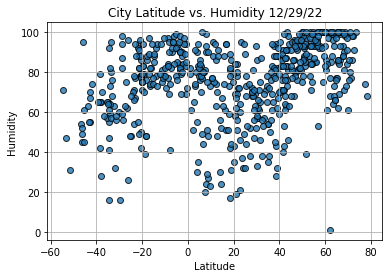

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

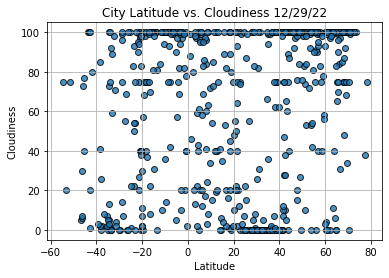

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig3.png")

# Show plot.
plt.show()

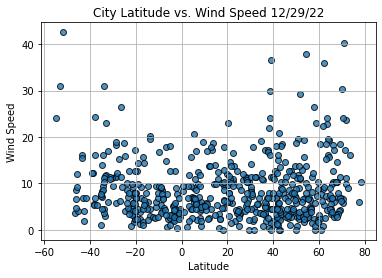

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig4.png")

# Show plot.
plt.show()